In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from table_reader import TableReader
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LogisticRegression

Hey folks, I'm just trying out a proof-of-concept jupyter notebook that uses our data retrieval code.

I got sick of working with environment variables so I switched to a new method to store our DB password:
    1. Create a file called config.json in the project root.
    2. Inside, config.json should look like this:
    {
        "database_url":"database_url_goes_here"
    }

TableReader's other vector methods are geodata_vector() and reviews_vector(). Be sure to call close() when you're done so it terminates the connection to the DB.

In [2]:
tr = TableReader()
prop = tr.properties_vector(include_amenitites=True)
geo = tr.geodata_vector()
tr.close()


In [3]:
df = pd.merge(geo,
            prop,
            on='listingID')

In [4]:
df.head()

,listingID,zipcode,latitude,longitude,"Brightwood Park, Crestwood, Petworth","Brookland, Brentwood, Langdon","Capitol Hill, Lincoln Park","Capitol View, Marshall Heights, Benning Heights","Cathedral Heights, McLean Gardens, Glover Park","Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace",...,Breakfast,Carbon monoxide detector,Dishes and silverware,Hot water,Wifi,Smoking allowed,First aid kit,Safety card,Hot tub,Laptop friendly workspace
0,124030,20001.0,38.91409,-77.02484,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,3344,20005.0,38.90126,-77.02857,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
2,3662,20020.0,38.86193,-76.98963,0,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
3,3686,20020.0,38.86314,-76.98836,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,3771,20009.0,38.92760,-77.03926,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [5]:
features = df[df.columns.drop(['price', 'listingID'])]
label = df['price']

In [6]:
model = ElasticNet()
esfm = SelectFromModel(model)
esfm.fit(features, label)
print(list(features.iloc[:, esfm.get_support(indices=True)]))

['Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street', 'Dupont Circle, Connecticut Avenue/K Street', 'accomodates', 'bathrooms', 'bedrooms', 'Serviced apartment', 'Entire home/apt', 'Private room', 'Shared room', 'Washer', 'Indoor fireplace', 'Free parking on premises', 'Elevator', 'Gym', 'Self check-in', 'Free street parking', 'Dryer', 'Family/kid friendly', 'Internet', 'Cable TV', 'TV', 'Lock on bedroom door', 'Pool', 'Fire extinguisher', 'First aid kit']


In [7]:
model = Lasso()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['zipcode', 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street', 'Dupont Circle, Connecticut Avenue/K Street', 'accomodates', 'bathrooms', 'bedrooms', 'Serviced apartment', 'Entire home/apt', 'Shared room', 'Indoor fireplace', 'Free parking on premises', 'Elevator', 'Gym', 'Self check-in', 'Free street parking', 'Dryer', 'Family/kid friendly', 'Internet', 'Cable TV', 'TV', 'Lock on bedroom door', 'First aid kit']


In [8]:
model = Ridge()
sfm = SelectFromModel(model)
sfm.fit(features, label)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['latitude', 'longitude', 'Capitol Hill, Lincoln Park', 'Cleveland Park, Woodley Park, Massachusetts Avenue Heights, Woodland-Normanstone Terrace', 'Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street', 'Dupont Circle, Connecticut Avenue/K Street', 'Edgewood, Bloomingdale, Truxton Circle, Eckington', 'Georgetown, Burleith/Hillandale', 'Howard University, Le Droit Park, Cardozo/Shaw', 'Kalorama Heights, Adams Morgan, Lanier Heights', 'Near Southeast, Navy Yard', 'Shaw, Logan Circle', 'Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point', 'Spring Valley, Palisades, Wesley Heights, Foxhall Crescent, Foxhall Village, Georgetown Reservoir', 'Union Station, Stanton Park, Kingman Park', 'West End, Foggy Bottom, GWU', 'bathrooms', 'bedrooms', 'Apartment', 'Condominium', 'Guest suite', 'House', 'Serviced apartment', 'Townhouse', 'Entire home/apt', 'Shared room', 'Bathtub', 'Air conditioning', 'Extra pillows and blankets', 'Hot tub']


In [9]:
elastic_data = df[list(features.iloc[:, esfm.get_support(indices=True)])]

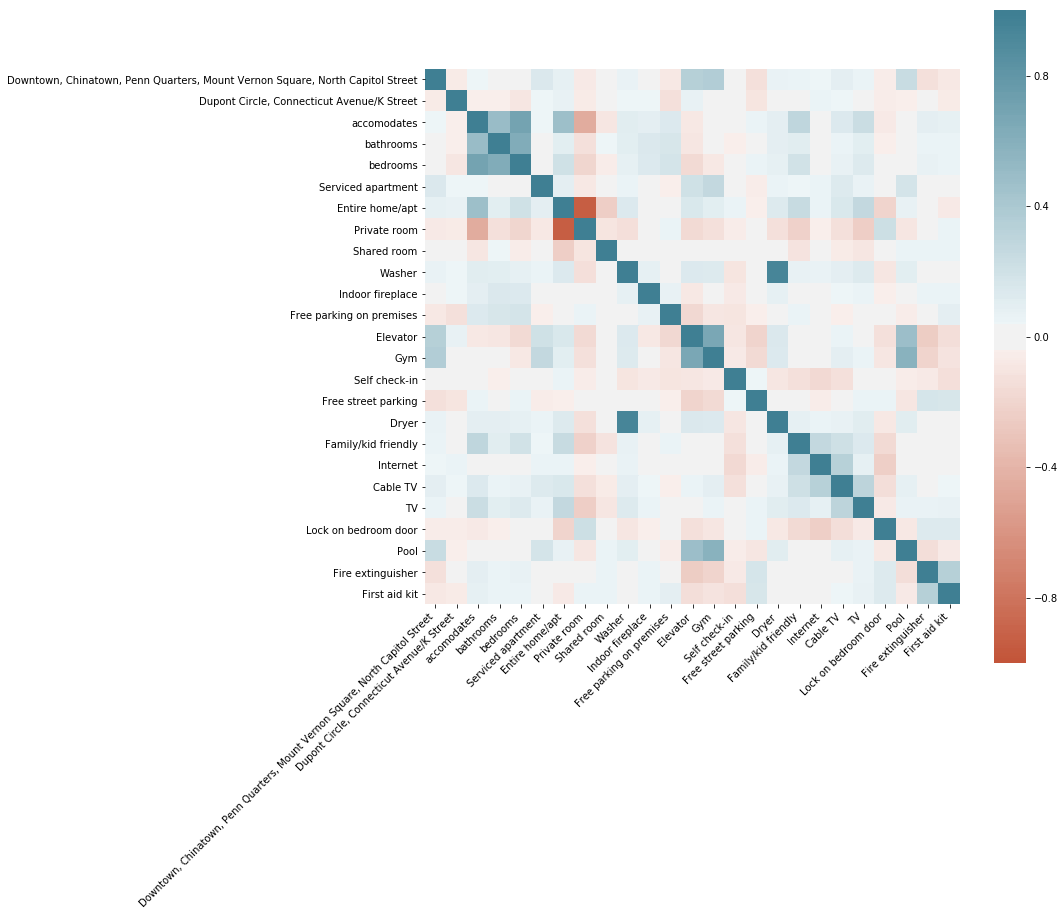

In [10]:
corr = elastic_data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = tts(features, label, test_size=0.2)


In [12]:
regr = LinearRegression()
regr.fit(X_train,y_train)
print(mean_squared_error(y_test, regr.predict(X_test)))
print(regr.score(X_test,y_test))

2683.882711246684
0.5294289159885712


In [13]:
import numpy as np

# try 200 different alphas between -10 and -2
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

model_ridge = RidgeCV(alphas=alphas)
model_ridge.fit(X_train, y_train)

#which alpha did it pick?
print(model_ridge.alpha_)


0.01


In [14]:
ridge = Ridge(alpha=0.01)
model_ridge.fit(X_train, y_train)
print(mean_squared_error(y_test, model_ridge.predict(X_test)))
print(model_ridge.score(X_test, y_test))

2683.977211874052
0.5294123469848386


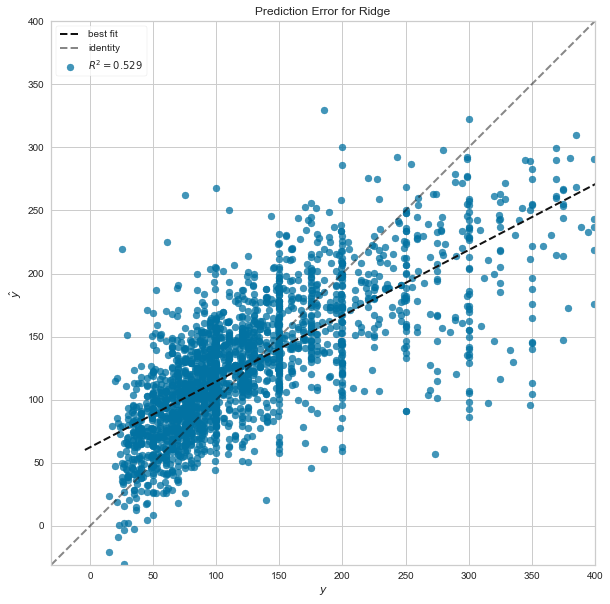

In [17]:
from yellowbrick.regressor import PredictionError

model = Ridge(alpha=0.01)
visualizer = PredictionError(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

In [20]:
from sklearn.model_selection import GridSearchCV


lasso = Lasso(random_state=0)

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_params = [{'alpha': alphas}]
n_folds = 12

grid = GridSearchCV(
    lasso, tuned_params, cv=n_folds
)

grid.fit(X_train, y_train)
print(grid.best_estimator_)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False)


In [21]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso.predict(X_test)))
lasso.score(X_test, y_test)

2683.8692973628704


0.5294312678744493

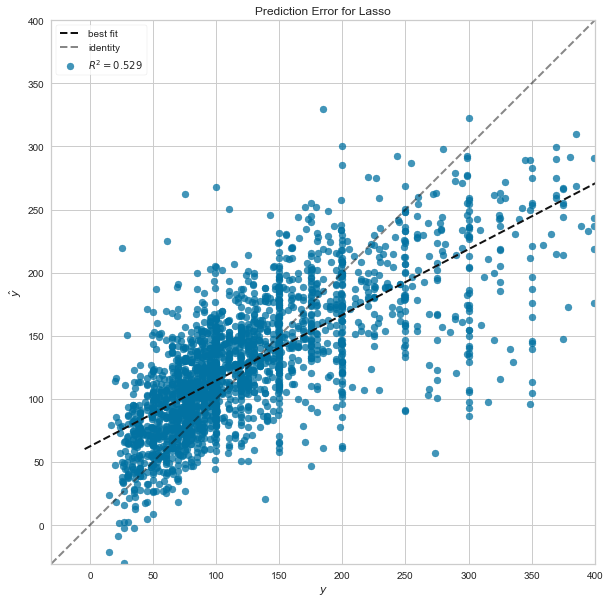

In [22]:
model = Lasso(alpha=0.001)
visualizer = PredictionError(model, size=(1080, 720))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data